<a href="https://colab.research.google.com/github/rajatpal00/Airline-passenger-referral-prediction/blob/main/Rajat_Pal_Capstone_Project_Airline_passenger_referral_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Dataset discription
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.
Feature descriptions briefly as follows:
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review
* customer review: Review of the customers in free text format
 
* aircraft: Type of the aircraft
* traveller type: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight
* date flown: Flight date
* seat comfort: Rated between 1-5
* cabin service: Rated between 1-5
* food bev: Rated between 1-5
* entertainment: Rated between 1-5
* ground service: Rated between 1-5
* value for money: Rated between 1-5

##The main objective is to predict whether passengers will refer the airline to their friends.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
main_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/capstone project/Airline Passenger Referral Prediction/data_airline_reviews.xlsx') 

In [3]:
main_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# info of dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

We can see that there are rows which have all features as NaN values.

so we wil be dropping those rows from our dataset

In [6]:
# droping the rows which have all values as NaN
main_df.dropna(how='all',inplace=True)        


###Duplicate values

In [7]:
#counting number of duplicate values
main_df.duplicated().sum()

4764

In [8]:
#droping duplicate rows
main_df.drop_duplicates(inplace=True)

##EDA

In [9]:
# shape of dataset after removing duplicte and All NaN value rows
main_df.shape

(61183, 17)

In [10]:
# info of dataset
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

####Checking for NaN 


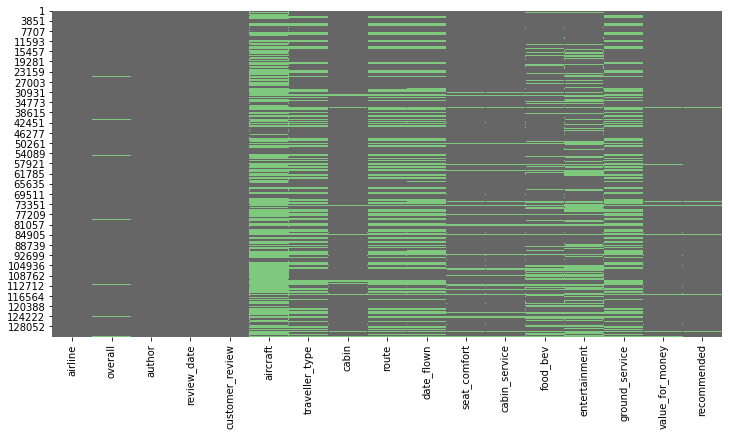

In [11]:
#ploting heatmap to see NaN values in each features
plt.figure(figsize=(12,6))
sns.heatmap(main_df.isna(),cbar=False,cmap='Accent_r')

In [12]:
# counting  NaN values in each features
main_df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
dtype: int64

From above we can see that there are many Nan values present in most of the features

###Describe

In [13]:
# finding statistical value of numerical columns
main_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Checking  Imbalance in dataset

---



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


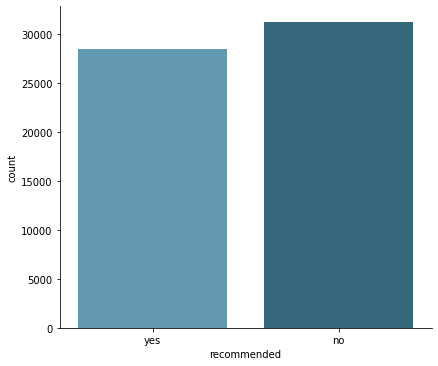

In [14]:
# ploting a bar graph to show count of class in recommended feature
sns.factorplot(x="recommended", data=main_df, kind="count", size=5, aspect=1.2, palette="PuBuGn_d")
plt.show()

In [15]:
#no of nan values in recommeded column
main_df['recommended'].isna().sum()

1422

### Understanding relation Between Target variable and Independent variable

In [16]:
# features present in dataset
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [17]:
# creating list of idependent variable which hare numerical or having low class in features 
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

overall


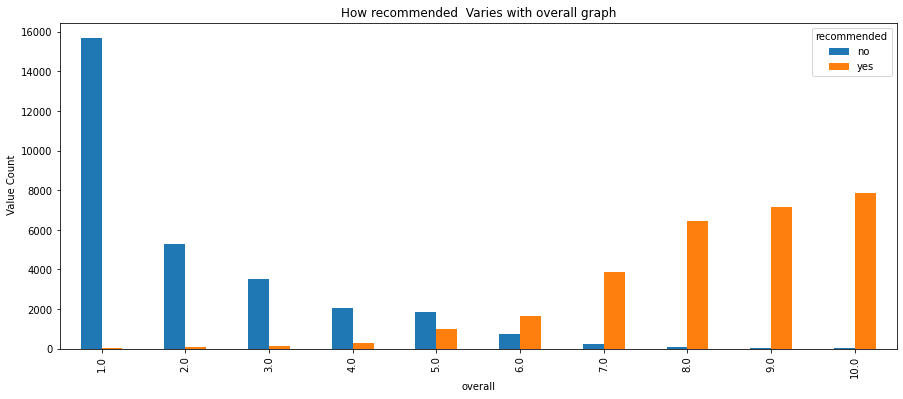

traveller_type


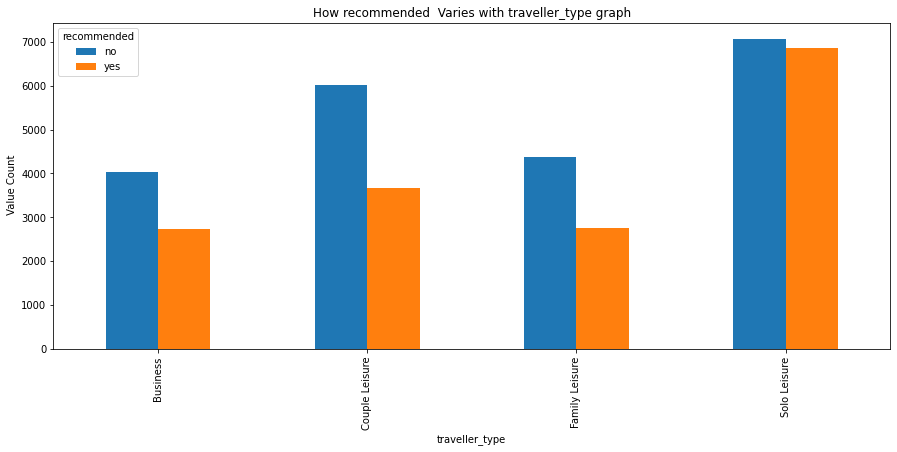

cabin


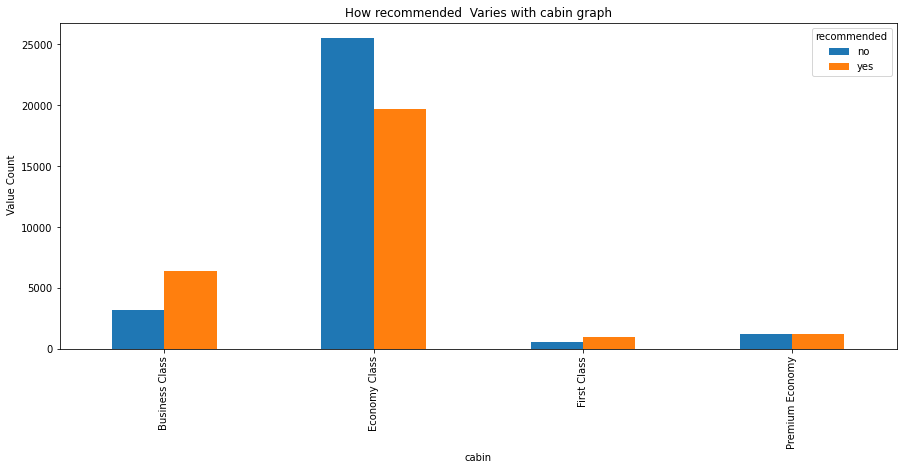

date_flown


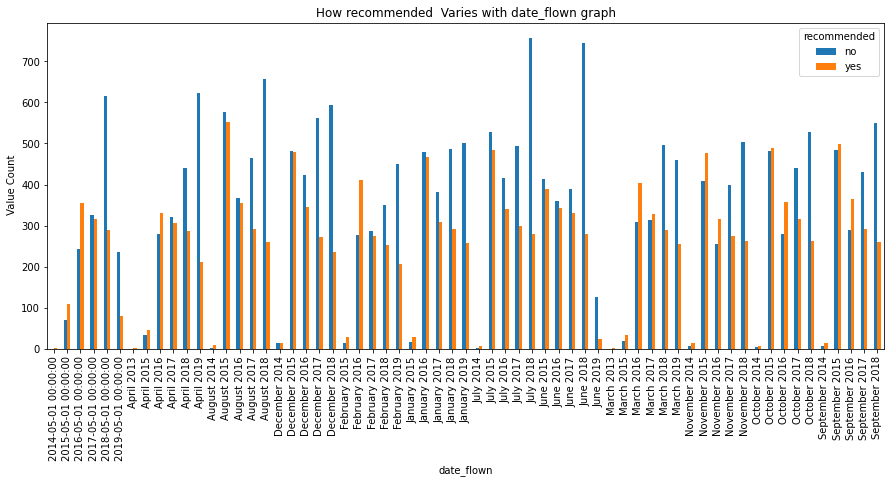

seat_comfort


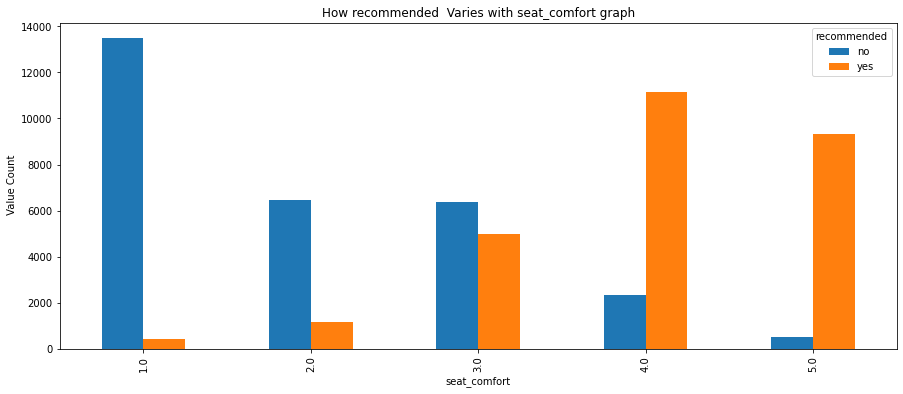

cabin_service


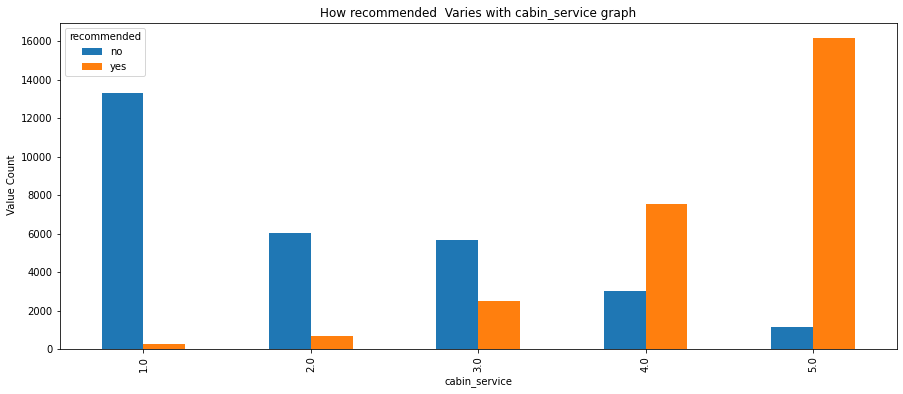

food_bev


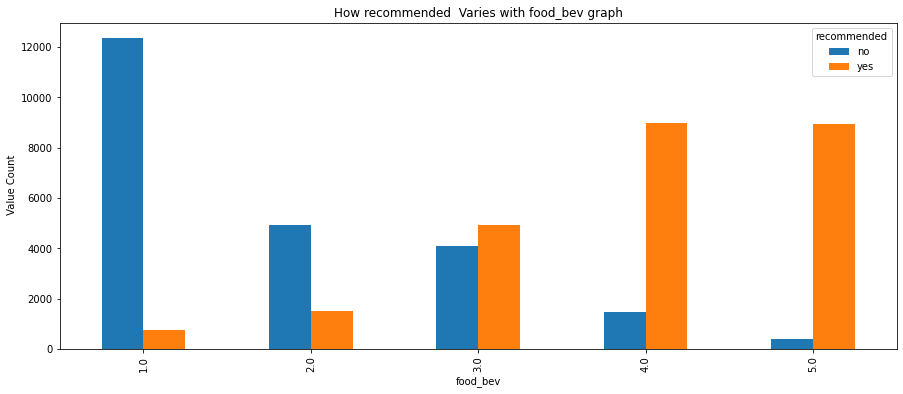

entertainment


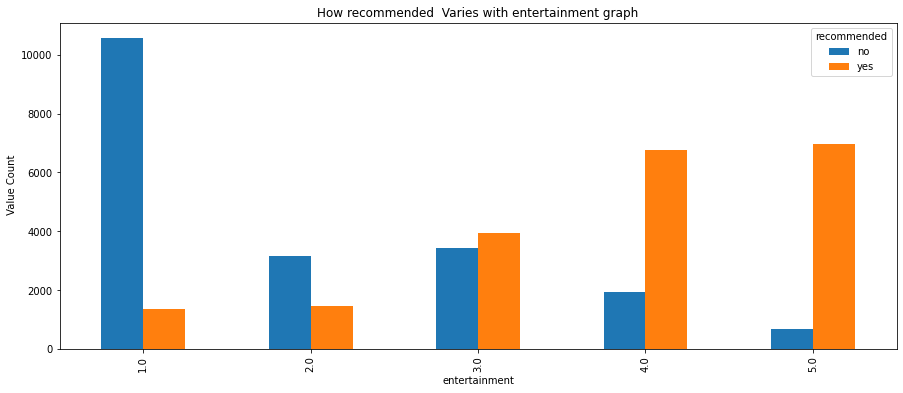

ground_service


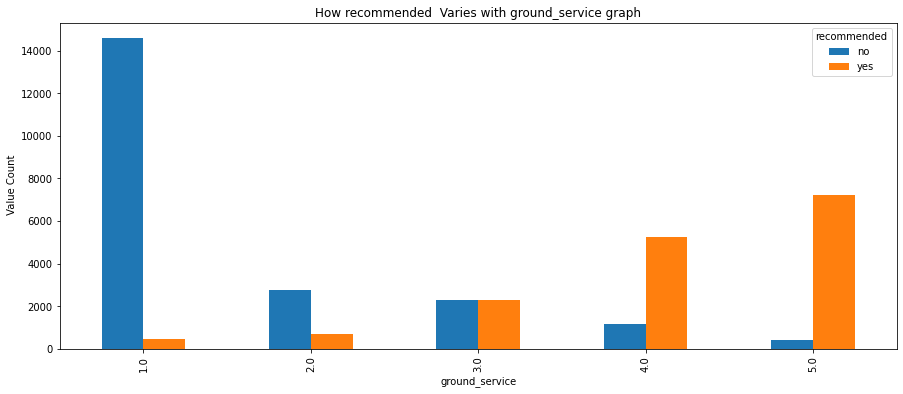

value_for_money


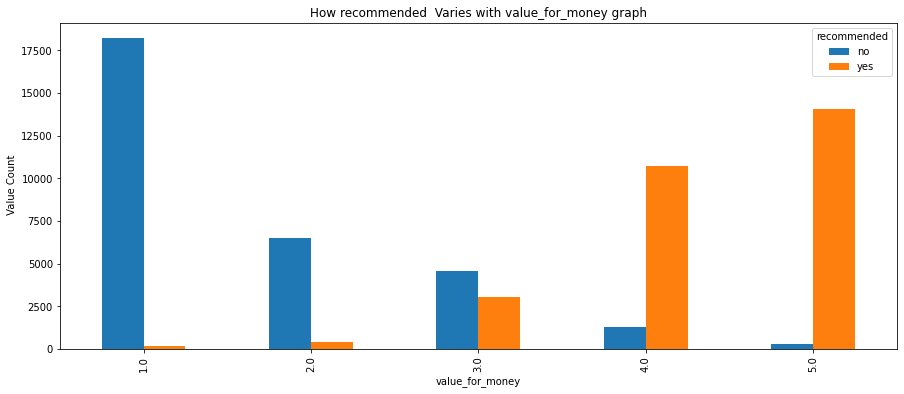

In [18]:
# ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  main_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()


In [67]:
m = main_df.groupby('airline')['recommended'].value_counts().sort_values(ascending=False).unstack()
m['total']= m['yes']+m['no']
m.sort_values(by='total',ascending=False,inplace=True)

m

recommended,no,yes,total
airline,,,
Spirit Airlines,2302,506,2808
American Airlines,2204,552,2756
United Airlines,2134,581,2715
British Airways,1503,1141,2644
Emirates,772,944,1716
...,...,...,...
QantasLink,22,80,102
Adria Airways,41,42,83
Air Arabia,58,22,80


In [68]:
m.reset_index(inplace=True)
m=m.iloc[:10]

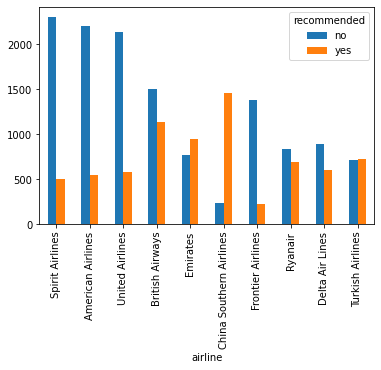

In [69]:
m.plot(x='airline',y=['no','yes'],kind='bar')

relation of recommended with route

In [73]:
m = main_df.groupby('route')['recommended'].value_counts().sort_values(ascending=False).unstack()
m['total']= m['yes']+m['no']
m.sort_values(by='total',ascending=False,inplace=True)

m

recommended,no,yes,total
route,,,
BKK to LHR,14.0,17.0,31.0
LHR to JFK,13.0,17.0,30.0
Vancouver to Toronto,23.0,5.0,28.0
LHR to BKK,9.0,18.0,27.0
Bangkok to Hong Kong,4.0,21.0,25.0
...,...,...,...
Mexico to Santiago via Mendoza,NaN,1.0,NaN
Mexico to Shanghai,NaN,1.0,NaN
Mexico to Shanghai via Tijuana,1.0,NaN,NaN


In [74]:
m.reset_index(inplace=True)
m=m.iloc[:5]

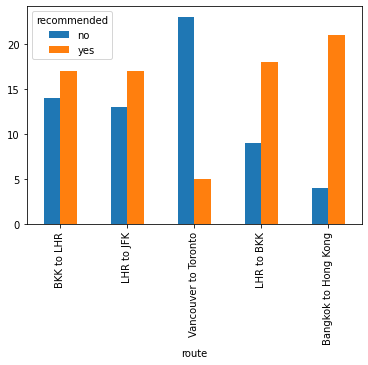

In [75]:
m.plot(x='route',y=['no','yes'],kind='bar')

###Conclusion of above graphs

**Numerical Features**
* From all above graphs we can see that when a person have given higher rating then we have also recommended to the  friend.
* we can also see some anomilities where a person have given very low rating and still recommended and visa versa.

> Overall feature
 * So one thing we can be sure of that if a person have given an overall rating of less than 2 we wont be recommended.
 * whereas a person who have given a rating greater than 8 there are high chances that he will recommend.

**Categorical Features**
> Travel Type
 * The number of not recommended is higher in all the Travel type class
 but couple is one class where the diffrence is higher Where as solo class have minimun diffrence.
 * From above we can conclude that people travelling in groups face more problems than people travelling alone.

> Cabin
 * Economy class is most unsatisfied by the services provided by the airline, thats why majority of them are not recommending.




##Imputation of Missing values in Target variable

We will try to find the missing values in recommended columns with the help of a model.

we have a text column where a person have written his experience on the flight, so with the help of sentiment analysis on this test data, we will try to Impute the missing values in recommended feature



In [76]:
# creating a seprate dataset to perform 
# data for navie bayes model
text_df=main_df[['customer_review','recommended']]
text_df

,customer_review,recommended
1,âœ… Trip Verified | London to Izmir via Istanb...,yes
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no
...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no
131888,I had a good flight from London to Kiev with U...,no
131890,Kiev - London (Gatwick) in business class (in ...,no
131892,Several flights - KBP to AMS (3 times one way)...,no


In [77]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_review  61183 non-null  object
 1   recommended      59761 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [79]:
# calulating the len of text
text_df['review_len']= text_df['customer_review'].str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:

text_df

,customer_review,recommended,review_len
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416
...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546
131888,I had a good flight from London to Kiev with U...,no,450
131890,Kiev - London (Gatwick) in business class (in ...,no,1531
131892,Several flights - KBP to AMS (3 times one way)...,no,772


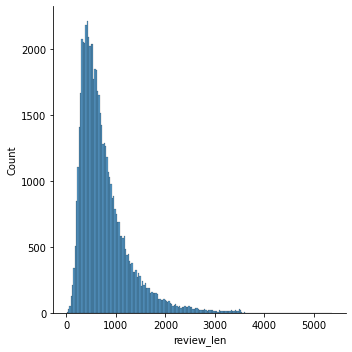

In [81]:
sns.displot(text_df['review_len'])

## Relation between len of text review and recommended columns

##Box plot

In [82]:
# doing goupby to plot bar graphs on bases of yes and no
GN= text_df.groupby('recommended')

no


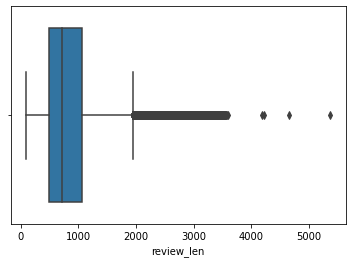

yes


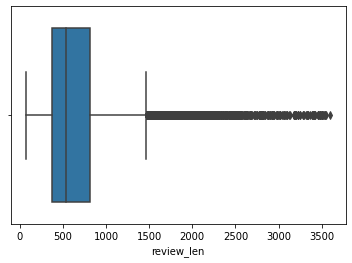

In [84]:
for name , name_df in GN:
  print(name)
  sns.boxplot(x='review_len',data= name_df)
  plt.show()

From above boxplot we can conclude that as the length of text increases the recommended value will be no

###Text Processesing  

In [85]:
# import re for regularExpression
# importing natural language toolkit
import re
import nltk


In [86]:
# importing stopwords from nitk corpus
from nltk.corpus import stopwords

In [87]:
# downloading all stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [88]:
# selecting all stop words from english 
stop_words=stopwords.words('english')

In [89]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [90]:
def text_cleaning(data):

  #remove all special character
  processed_feature = re.sub(r'\W', ' ', str(data))

  # remove all single characters
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

  # Remove single characters from the start
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

  # Substituting multiple spaces with single space
  processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

  # Removing prefixed 'b'
  processed_feature = re.sub(r'^b\s+', '', processed_feature)

  # Converting to Lowercase
  processed_feature = processed_feature.lower()

  
  processed_feature = processed_feature.split(' ')

  # using lemmatization on words
  processed_feature = [lemmatizer.lemmatize(i) for i in processed_feature]

  # creating 2gram 
  processed_feature = [ ''.join(processed_feature[i:i+2]) for i in range(len(processed_feature)-1)]
  

  # removing stopword
  processed_feature = ' '.join([i for i in processed_feature if i not in stop_words])

  return processed_feature

    
  

In [91]:
# creating token of words with the help of text cleaning function
text_df['tokenized_mess'] = text_df['customer_review'].apply(text_cleaning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [92]:
text_df

,customer_review,recommended,review_len,tokenized_mess
1,âœ… Trip Verified | London to Izmir via Istanb...,yes,1143,âœtrip tripverified verifiedlondon londonto to...
3,âœ… Trip Verified | Istanbul to Bucharest. We ...,no,467,âœtrip tripverified verifiedistanbul istanbult...
5,âœ… Trip Verified | Rome to Prishtina via Ista...,no,1648,âœtrip tripverified verifiedrome rometo topris...
7,âœ… Trip Verified | Flew on Turkish Airlines I...,yes,955,âœtrip tripverified verifiedflew flewon onturk...
9,âœ… Trip Verified | Mumbai to Dublin via Istan...,no,416,âœtrip tripverified verifiedmumbai mumbaito to...
...,...,...,...,...
131886,Two domestic flights between Kiev and Lviv las...,no,546,twodomestic domesticflight flightbetween betwe...
131888,I had a good flight from London to Kiev with U...,no,450,ihad hadgood goodflight flightfrom fromlondon ...
131890,Kiev - London (Gatwick) in business class (in ...,no,1531,kievlondon londongatwick gatwickin inbusiness ...
131892,Several flights - KBP to AMS (3 times one way)...,no,772,severalflight flightkbp kbpto toam am3 3time t...


Seprating NaN and Non Nan values in recommender columns

In [94]:
# dataset when we dropped all NaN values from recommended columns
text_df_1 = text_df.dropna() 

In [95]:
# dataset with NaN values
text_df_2 = text_df[text_df['recommended'].isna()]


Creating Testing and training dataset

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [97]:
# creating test train set for model training  on data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(text_df_1['tokenized_mess'],text_df_1['recommended'],test_size=0.25)

### TF-idf vectorization

In [98]:
# there are more than 10K features 
# setting max_features to 7500 for system performance 
vectorization = TfidfVectorizer(max_features=7500,min_df=7,max_df=0.8)

In [99]:
# creating array of taining dataset
X_train = vectorization.fit_transform(X_train).toarray()

# creating array on test dataset with the help of toarray
X_test = vectorization.transform(X_test).toarray()

In [100]:
len(vectorization.get_feature_names())

7500

In [101]:
#importing naive bayes classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


Applying Gaussian naive bayes

In [102]:
# training Gausssian Naive bayes classifier
GNB  = GaussianNB().fit(X_train,y_train)

In [103]:
# predicting on train data
y_train_pred_gnb = GNB.predict(X_train)

# predicting on test data
y_test_pred_gnb = GNB.predict(X_test)

Applying Multinomial Naive bayes

In [104]:
#creating MultinomialNaive bayes
MNB = MultinomialNB().fit(X_train,y_train)

In [105]:
# predicting on train data
y_train_pred_mnb = MNB.predict(X_train)

# predicting on test data
y_test_pred_mnb = MNB.predict(X_test)

Applying Bernoulli Naive bayes

In [106]:
# applying bernoulii Naive bayes
BNB = BernoulliNB().fit(X_train,y_train)

In [107]:
# predicting on train data
y_train_pred_bnb = BNB.predict(X_train)

# predicting on train data
y_test_pred_bnb = BNB.predict(X_test)


In [108]:
# importing classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(confusion_matrix(y_train,y_train_pred_gnb))
print(confusion_matrix(y_test,y_test_pred_gnb))

[[20153  3306]
 [ 2240 19121]]
[[6628 1181]
 [ 884 6248]]


####Result of GaussianNB

In [110]:
print(classification_report(y_train,y_train_pred_gnb))
print("\n")
print(classification_report(y_test,y_test_pred_gnb))

              precision    recall  f1-score   support

          no       0.90      0.86      0.88     23459
         yes       0.85      0.90      0.87     21361

    accuracy                           0.88     44820
   macro avg       0.88      0.88      0.88     44820
weighted avg       0.88      0.88      0.88     44820



              precision    recall  f1-score   support

          no       0.88      0.85      0.87      7809
         yes       0.84      0.88      0.86      7132

    accuracy                           0.86     14941
   macro avg       0.86      0.86      0.86     14941
weighted avg       0.86      0.86      0.86     14941



####Result of MultinomialNB

In [111]:
print(classification_report(y_train,y_train_pred_mnb))
print("\n")
print(classification_report(y_test,y_test_pred_mnb))

              precision    recall  f1-score   support

          no       0.89      0.85      0.87     23459
         yes       0.84      0.88      0.86     21361

    accuracy                           0.87     44820
   macro avg       0.87      0.87      0.87     44820
weighted avg       0.87      0.87      0.87     44820



              precision    recall  f1-score   support

          no       0.88      0.84      0.86      7809
         yes       0.84      0.88      0.86      7132

    accuracy                           0.86     14941
   macro avg       0.86      0.86      0.86     14941
weighted avg       0.86      0.86      0.86     14941



###Result of BernoulliNB

In [112]:
print(classification_report(y_train,y_train_pred_bnb))
print("\n")
print(classification_report(y_test,y_test_pred_bnb))

              precision    recall  f1-score   support

          no       0.90      0.76      0.82     23459
         yes       0.77      0.90      0.83     21361

    accuracy                           0.83     44820
   macro avg       0.84      0.83      0.83     44820
weighted avg       0.84      0.83      0.83     44820



              precision    recall  f1-score   support

          no       0.89      0.75      0.81      7809
         yes       0.76      0.90      0.83      7132

    accuracy                           0.82     14941
   macro avg       0.83      0.82      0.82     14941
weighted avg       0.83      0.82      0.82     14941



In above code we see that multinomial is performing best in all naive bayes classifier

With the help of this classifier lets try to find the NaN values of recommender columns.

In [113]:
# creating arry of word with the help of tf-idfvectorizer 
# on NaN value dataset
X_new= vectorization.transform(text_df_2['tokenized_mess']).toarray()

In [114]:
# predicting on NaN dataset
text_df_2['recommended']=  MNB.predict(X_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
text_df_2

,customer_review,recommended,review_len,tokenized_mess
65,âœ… Trip Verified | Lagos to Istanbul via Kath...,no,629,âœtrip tripverified verifiedlagos lagosto tois...
153,âœ… Trip Verified | Seychelles to Birmingham v...,no,469,âœtrip tripverified verifiedseychelles seychel...
209,âœ… Trip Verified | London to Bangkok via Ista...,yes,213,âœtrip tripverified verifiedlondon londonto to...
211,âœ… Trip Verified | At check-in in Johannesbur...,no,803,âœtrip tripverified verifiedat atcheck checkin...
261,âœ… Trip Verified | San Francisco to Mashhad v...,no,527,âœtrip tripverified verifiedsan sanfrancisco f...
...,...,...,...,...
131460,âœ… Trip Verified | Kiev to Riga. 24 hrs befor...,no,1437,âœtrip tripverified verifiedkiev kievto toriga...
131554,âœ… Verified Review | Flew Ukraine Internation...,no,1375,âœverified verifiedreview reviewflew flewukrai...
131648,We travelled Ukraine International from London...,no,1431,wetravelled travelledukraine ukraineinternatio...
131726,DXB-KBP-LGW. Both planes were 737-800s but the...,no,411,dxbkbp kbplgw lgwboth bothplane planewere were...


### Imputing the result of above model in missing values of recommender feature


In [116]:
#varibale which have Nan values in recommended features
recommended_nan = main_df['recommended'].isna()

In [117]:
# imputation of depended variable with prediction MNB model
main_df.loc[recommended_nan,'recommended'] = text_df_2['recommended']

##Imputing Nan values in Independed features

We will be droping the columns which have more than 60% of  data as Nan and is Categorical features

As from heat map we can see that there are few features which have NaN values, it would be right decision to drop the features which have More that 60% values as NaN, as imputing them will only create baisness in the dataset

In [118]:
# function to get columns which have more than 60% values as NaN
def null_percentage(name):
  'this function will collect all features which have nan vaalues more than 60%'
  drop_features =[]
  for i in name:
    null_value= main_df[i].isna().sum()
    if (null_value/len(main_df)) > 0.6:
      drop_features.append(i)

  return drop_features

In [119]:
# applying function
droping_features= null_percentage(features)
droping_features


['aircraft']

In [120]:
# count of uniques aircraft present  in this columns
len(main_df.aircraft.unique())

2089

In [121]:
# droping these features
main_df.drop(droping_features,axis=1,inplace=True)

#### Imputing NaN in numerical columns

we have 7 numerical columns 

if a person have given high review to seat_comfort, food_bev, ground service, cabin_service ,entertainment then there is high chance that overall ratting will also be high and visa versa.

we have also seen that recommended is highly dependent on overall review.


lets try to find all rows which have nan values for every numerical variable

In [122]:
main_df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [123]:
# selcting all rows which have numeriacal feature as Nan
Nan_no = (main_df['overall'].isna()) & (main_df['recommended']=='no') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna() & (main_df['cabin_service'].isna()))

In [124]:
# checking the rows 
main_df[Nan_no]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
13775,KLM Royal Dutch Airlines,NaN,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
14435,Virgin America,NaN,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
23179,Delta Air Lines,NaN,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
25095,Southwest Airlines,NaN,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
25431,Southwest Airlines,NaN,J Fenston,11th July 2011,Never flying Southwest again. Their boarding/s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


Here we found all rows which have recommended as no and NaN values in all review columns

We will be replacing these NaN values whith 1

In [125]:
# fill Nan values by 1
main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(1)

In [126]:
# checking the dataframe after imputation
main_df.loc[Nan_no]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
13775,KLM Royal Dutch Airlines,1.0,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
14435,Virgin America,1.0,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
23179,Delta Air Lines,1.0,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
25095,Southwest Airlines,1.0,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
25431,Southwest Airlines,1.0,J Fenston,11th July 2011,Never flying Southwest again. Their boarding/s...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131888,Ukraine International,1.0,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131890,Ukraine International,1.0,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no
131892,Ukraine International,1.0,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,no


#### When recommended is YES

The numerical features are having NaN values

Replacing those NaN values to a valid value on the bases of recommended column

In [127]:
Nan_yes=(main_df['overall'].isna()) & (main_df['recommended']=='yes') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna())

In [128]:
# fillinng Nan vaues by 5
main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] =main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(5)

### Replacing NaN values
In numerical features apart from overall feature to median values of respected features

In [129]:
main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].median())

In [130]:
main_df.isna().sum()

airline                0
overall             1642
author                 0
review_date            0
customer_review        0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

###Creating a Average column
which have avrg score of (all numerical features except overall)

In [131]:
main_df['Avg_num']= (main_df['seat_comfort']+ main_df['cabin_service']+ main_df['food_bev']+main_df['entertainment']+main_df['ground_service']+main_df['value_for_money'])//6

### Finding NaN in overall feature
We will be replacing all Nan values in overall feature by avg colummn

In [132]:
# finding all nan values in overall
m=(main_df['overall'].isna())

In [133]:
# filling NaN value in overall with 2* avg num
main_df.loc[m,'overall']= main_df.loc[m,'Avg_num']*2

Droping all Non important columns/features

In [134]:
 # droping Non important features
main_df.drop(['author','review_date','date_flown','route'],axis=1,inplace=True)

## working on Text and Categorical features

**Airline**

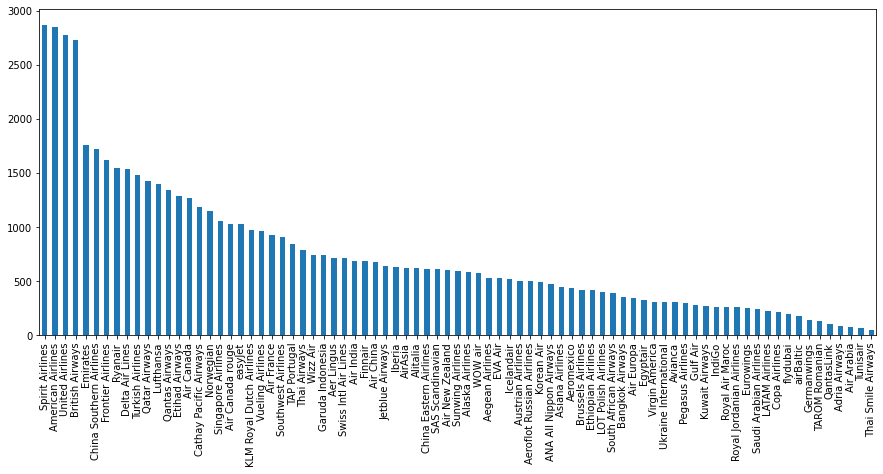

In [135]:
# graph showing count of each airline 
main_df['airline'].value_counts().plot(kind='bar',figsize=(15,6))

We can do one hot incoding to these categorical values

**Cabin**

In [136]:
# counting number of unique classes in this feature
main_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

**Travel Type**

In [137]:
# counting number of unique classes in this feature
main_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

customer review

In [138]:
main_df['customer_review'][5]

'âœ… Trip Verified | Rome to Prishtina via Istanbul. I flew with this company several times in the past years, and I can honestly say that it is getting worse and worse. I flew from Rome to Prishtina via Istanbul, all 4 flights had a delay (which apparently is pretty normal with Turkish). The ground staff is for the most part useless. In Istambul i have tried to ask a few information about a flight delay (i had just 30 minutes before the connecting flight) and the whole answer was: "Relax Sir, No problem Sir, It\'s okay". The new airport is a gigantic mess, very big and disorganized. When you land in Istanbul it takes about 20 to 25 minutes taxiing and other 10 minutes before they actually start disembarking, it\'s an exhausting experience especially if you are in a hurry. Forget about asking for some indication at the new airport, they all chat between each other, some with a coffee in their hands. I flew with four different aircraft on this trip, two were fairly new, the other two we

In [139]:
# replacing yes =1 and no =0 in recommended column
main_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [140]:
# checking for NaN values in columns
main_df.isna().sum()

airline                0
overall                0
customer_review        0
traveller_type     23643
cabin               2478
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
Avg_num                0
dtype: int64

## Sentiment analysis using vadar

In [141]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 7.6MB/s 


In [142]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [143]:
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [144]:
# creating a polarity column
# to store sentiment analysis score on text data
main_df['polarity']= main_df['customer_review'].apply(sentiment_scores)

## Converting qualitative features
 Into number for machine learning as  most machine learning alogorithm takes numerical values.

 In our dataset we have 3 categorical columns 
> Airline
 * airline columns have zero NaN values so we can we Dummy variable encoding as this will give us one less feature as airline column have large number of categoreis

> Travell type
 * These values dont have natural ordering and column have NaN values so its better to use One hot encoding.
 *  Here we have 4 class 
  * Solo
  * Couple
  * Family
  * Business

 

> Cabin
*  These values have a natural ordering as business class is expensive than economy class.
* we can rank these classes so in this dataset we see higher means better so
 * economy =  1
 * premium economy = 2
 * business class = 3
 * first class = 4

 * But we are having Nan value in these features so i will be doing one hot encoding

   

Doing One hot encoding for categorical variables

In [145]:
# categoriacal features to do one hot encoding
colms=['airline','cabin','traveller_type']

In [146]:
new_df= pd.get_dummies(main_df,columns=colms)

In [147]:
ind_features = new_df.columns.drop(['customer_review','recommended'])


In [148]:
dep_features = 'recommended'

In [149]:
ind_features

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'Avg_num', 'polarity',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'a

## Feature scaling 


In [150]:
 data = new_df[ind_features]
 Y= new_df[dep_features]

In [151]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [152]:
feature_scaler= MinMaxScaler()

In [153]:
data = feature_scaler.fit_transform(data)

In [154]:
data

array([[0.66666667, 0.75      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Training the dataset 


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(data,Y, test_size =0.2,random_state=0)


In [157]:
X_train.shape,X_test.shape

((48946, 98), (12237, 98))

## Training model

In [158]:
# importing all models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [159]:
# importing  metrics for evaluation  
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [160]:
# import time module
import time

In [161]:
#declare the models
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
svc_model=LinearSVC()
Mnb_model=MultinomialNB()


#create a list of models
models=[lr_model,svc_model,Mnb_model,dt_model,rf_model,gbc_model,xgb_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [162]:
result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

In [163]:
result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,95.52,95.30,95.26,95.17,95.37,94.95,95.52,95.29,0.952853,1.903780
1,LinearSVC,95.50,95.35,95.22,95.19,95.35,95.04,95.49,95.34,0.953360,0.998140
2,MultinomialNB,87.62,87.49,82.45,82.54,94.09,93.49,87.90,87.76,0.877628,0.025687
3,DecisionTreeClassifier,99.99,93.36,100.00,92.84,99.98,93.25,99.99,93.36,0.933594,1.160871
4,RandomForestClassifier,99.99,95.29,100.00,95.80,99.98,94.25,99.99,95.25,0.952454,8.838319
5,GradientBoostingClassifier,95.61,95.32,95.62,95.56,95.16,94.56,95.59,95.28,0.952829,25.823651
6,XGBClassifier,95.59,95.29,95.63,95.49,95.11,94.58,95.57,95.26,0.952603,10.930978


##Confusion Matrix for Train set

Confusion matrix for LogisticRegression
[[24475  1109]
 [ 1082 22280]]


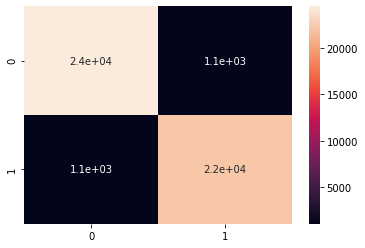


Confusion matrix for LinearSVC
[[24466  1118]
 [ 1086 22276]]


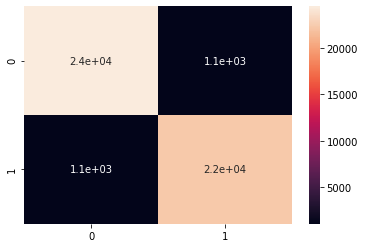


Confusion matrix for MultinomialNB
[[20904  4680]
 [ 1380 21982]]


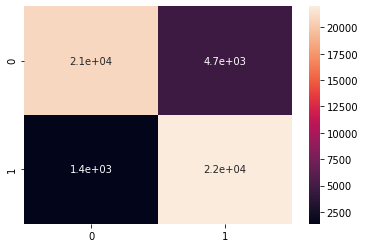


Confusion matrix for DecisionTreeClassifier
[[25584     0]
 [    5 23357]]


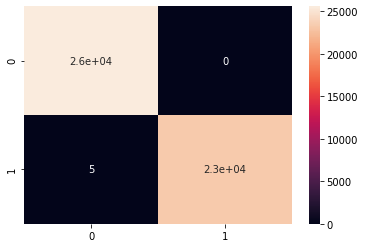


Confusion matrix for RandomForestClassifier
[[25583     1]
 [    4 23358]]


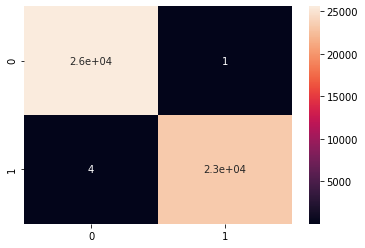


Confusion matrix for GradientBoostingClassifier
[[24565  1019]
 [ 1131 22231]]


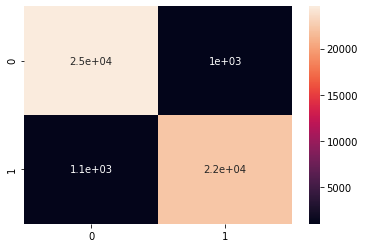


Confusion matrix for XGBClassifier
[[24569  1015]
 [ 1142 22220]]


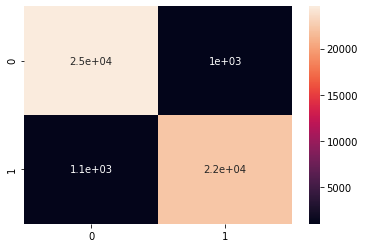

In [164]:
#confusion matrix of train set
for key,value in dct_train.items():
  print(f'Confusion matrix for {key}')
  print(value)
  sns.heatmap(value,annot=True)
  plt.show()
  print()

### Confusion matrix for test dataset

 Confusion matrix for LogisticRegression  
[[6130  281]
 [ 294 5532]]


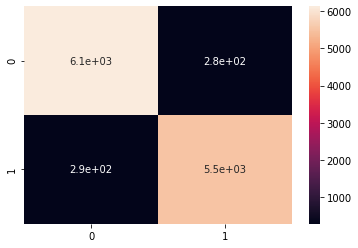


 Confusion matrix for LinearSVC  
[[6131  280]
 [ 289 5537]]


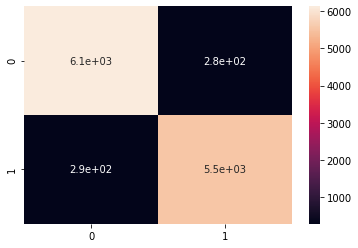


 Confusion matrix for MultinomialNB  
[[5259 1152]
 [ 379 5447]]


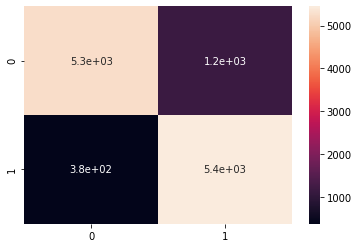


 Confusion matrix for DecisionTreeClassifier  
[[5992  419]
 [ 393 5433]]


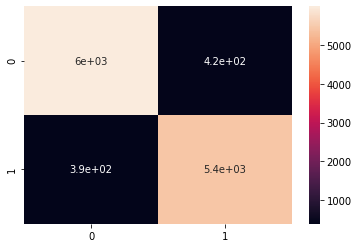


 Confusion matrix for RandomForestClassifier  
[[6170  241]
 [ 335 5491]]


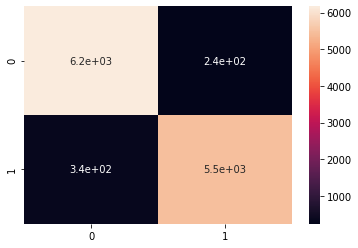


 Confusion matrix for GradientBoostingClassifier  
[[6155  256]
 [ 317 5509]]


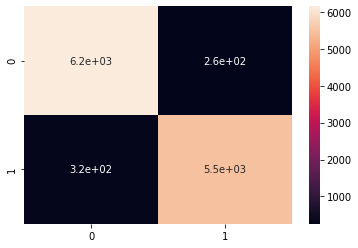


 Confusion matrix for XGBClassifier  
[[6151  260]
 [ 316 5510]]


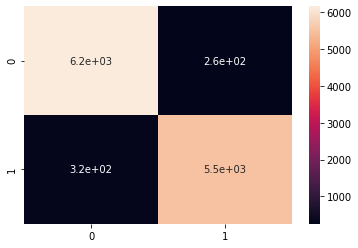

In [165]:
for key,value in dct_test.items():
  print(f' Confusion matrix for {key}  ')
  print(value)
  sns.heatmap(value,annot=True)
  plt.show()
  print()

## Cross validation and Hyperparameter  tuning

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

####Logistic Regression

###cross validation

In [167]:
accuracy = cross_val_score(lr_model, X_train, y_train, scoring='accuracy', cv = 10)
print(accuracy)




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.94954035 0.95321757 0.95342186 0.9526047  0.96057201 0.95444331
 0.95177769 0.95729465 0.95647732 0.95463833]


In [168]:
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 95.43987780998016


In [169]:
lr_model = LogisticRegression(random_state= 4)
parameters ={"C":[1e-9,1e-6,1e-3,1e-2,1e-1,1,1e2,1e3,1e6]}
lr_model_cv= GridSearchCV(lr_model,parameters,cv=4)
lr_model_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=4, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-09, 1e-06, 0.001, 0.01, 0.1, 1, 100.0, 1000.0,
                               1000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [170]:
lr_model_cv.best_params_

{'C': 100.0}

In [171]:
y_test_pred = lr_model_cv.predict(X_test)

In [172]:
accuracy_score(y_test,y_test_pred)

0.9532565171202092

In [173]:
print(confusion_matrix(y_test,y_test_pred))

[[6134  277]
 [ 295 5531]]


###Random forest

In [174]:
rf_model=RandomForestClassifier(random_state =10)


In [175]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [176]:

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 70, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


In [177]:
param = {'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,}

In [178]:
param

{'max_depth': [50, 56, 63, 70, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5]}

In [179]:
rf_model_cv= GridSearchCV(rf_model,param,cv=4)
rf_model_cv.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=10,
                                  

In [180]:
best = rf_model_cv.best_params_

In [181]:
y_test_predrf = rf_model_cv.predict(X_test)

In [182]:
accuracy_score(y_test,y_test_predrf)

0.9539102721255209

In [183]:
print(confusion_matrix(y_test,y_test_predrf))

[[6168  243]
 [ 321 5505]]


##Working on Anomaly

### finding anomaly in overall feature with respect to recommended

Finding overall values which are wrongly classified as (1,2) where there average is higher than 2.

Replacing these values as 2* avg_value



In [184]:
wrong_overall = (main_df['Avg_num']>2) & (main_df['recommended']=='yes') & (main_df['overall']<=2)

In [185]:
# replacing overall value to 2* avg value
main_df.loc[wrong_overall,'overall'] = main_df.loc[wrong_overall,'Avg_num']*2 

## working more on anomility

In [186]:
# trying to find all those values which have low over all value
# and recommended is yes
main_df[(main_df['overall']<= 2) & (main_df['recommended']==1)]

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Avg_num,polarity
207,Turkish Airlines,2.0,âœ… Trip Verified | Belgrade to Kiev via Istan...,Solo Leisure,Economy Class,5.0,5.0,4.0,4.0,4.0,2.0,1,4.0,-0.3257
1155,Turkish Airlines,2.0,âœ… Verified Review | Munich to Istanbul. The ...,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,1,3.0,0.0000
1453,Turkish Airlines,1.0,"25 hours before the departure, Turkish Airline...",Solo Leisure,Business Class,3.0,3.0,3.0,3.0,1.0,1.0,1,2.0,-0.3400
1657,Turkish Airlines,1.0,Dublin to Jakarta via Istanbul. A total shambl...,Solo Leisure,Business Class,1.0,2.0,2.0,1.0,1.0,2.0,1,1.0,-0.9761
1845,Turkish Airlines,2.0,"Rome to Istanbul, and when this flight landed ...",Couple Leisure,Economy Class,4.0,1.0,3.0,3.0,5.0,2.0,1,3.0,-0.8706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123702,Aer Lingus,1.0,âœ… Trip Verified | Seattle to Birmingham via ...,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,1,3.0,-0.8687
125468,Alaska Airlines,2.0,âœ… Trip Verified | Maui to Seattle. In the th...,Family Leisure,Business Class,2.0,2.0,3.0,3.0,2.0,2.0,1,2.0,-0.7962
127182,Norwegian,2.0,âœ… Trip Verified | Copenhagen to Helsinki. Fl...,Solo Leisure,Economy Class,4.0,1.0,2.0,3.0,4.0,4.0,1,3.0,0.0000
128936,Norwegian,2.0,CPH-LGW-CPH same day. Obama in CPH and snowsto...,NaN,Economy Class,3.0,3.0,3.0,3.0,3.0,4.0,1,3.0,0.3182


In [187]:
yes = (main_df['overall']<= 2) & (main_df['recommended']==1)

In [188]:
# replacing recommended  value of 1  to 0
main_df.loc[yes,'recommended'] = 0 

In [189]:
no = (main_df['overall']>=9) & (main_df['recommended']==0)

In [190]:
#replacing recommender value of 0 to 1
main_df.loc[no,'recommended'] = 1

In [191]:
main_df

,airline,overall,customer_review,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Avg_num,polarity
1,Turkish Airlines,7.0,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1,3.0,0.9386
3,Turkish Airlines,2.0,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.2732
5,Turkish Airlines,3.0,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,0,2.0,-0.9192
7,Turkish Airlines,10.0,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,1,4.0,0.9718
9,Turkish Airlines,1.0,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,-0.7599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Two domestic flights between Kiev and Lviv las...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.9183
131888,Ukraine International,1.0,I had a good flight from London to Kiev with U...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.8042
131890,Ukraine International,1.0,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,-0.7131
131892,Ukraine International,1.0,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,0.5267


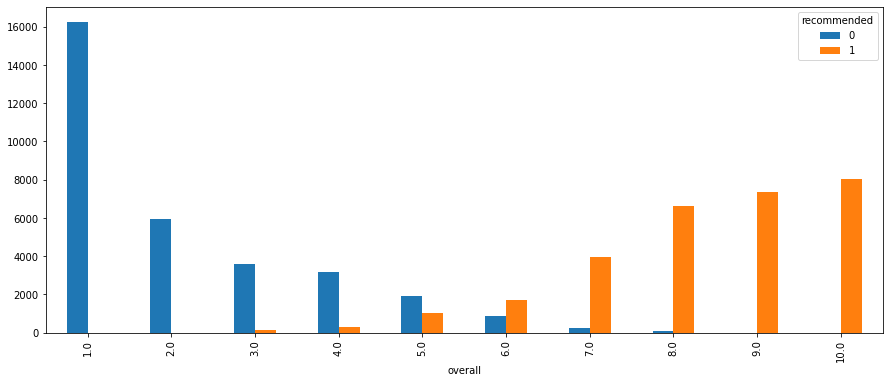

In [210]:
main_df.groupby(['overall'])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))

##Training model by treating anomaly

In [192]:
new_df= pd.get_dummies(main_df,columns=colms)

In [193]:
ind_features = new_df.columns.drop(['customer_review','recommended'])


In [194]:
dep_features = 'recommended'

In [195]:
ind_features

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'Avg_num', 'polarity',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'a

## Feature scaling 


In [196]:
 data = new_df[ind_features]
 Y= new_df[dep_features]

In [197]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [198]:
feature_scaler= MinMaxScaler()

In [199]:
data = feature_scaler.fit_transform(data)

In [200]:
data

array([[0.66666667, 0.75      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Training the dataset 


In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_train,y_test = train_test_split(data,Y, test_size =0.2,random_state=0)


In [203]:
X_train.shape,X_test.shape

((48946, 98), (12237, 98))

In [204]:
#declare the models
lr_model=LogisticRegression(C=10)
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(max_depth= 60, min_samples_leaf = 1, min_samples_split= 5)
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
svc_model=LinearSVC()
Mnb_model=MultinomialNB()


#create a list of models
models=[lr_model,svc_model,Mnb_model,dt_model,rf_model,gbc_model,xgb_model]

#creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [205]:
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [206]:
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,96.02,95.84,95.80,95.74,95.85,95.49,96.01,95.82,0.958241,1.930401
1,LinearSVC,96.03,95.81,95.83,95.72,95.84,95.44,96.02,95.79,0.957905,0.714769
2,MultinomialNB,87.89,87.84,82.65,82.79,94.42,93.95,88.19,88.13,0.881287,0.024692
3,DecisionTreeClassifier,100.00,94.24,100.00,93.89,100.00,94.00,100.00,94.23,0.942274,0.608920
4,RandomForestClassifier,99.02,95.77,98.96,96.04,98.98,95.01,99.02,95.73,0.957313,7.527230
5,GradientBoostingClassifier,96.06,95.82,96.06,95.93,95.66,95.25,96.04,95.80,0.957972,24.090334
6,XGBClassifier,95.97,95.81,95.93,95.90,95.61,95.25,95.96,95.78,0.957816,11.029793


##Conclusion

* Most of the model we train on default hyperparameters gave accuracy of 95%.
* By treating anomaly we where able to increase the accuracy by 0.5% in logistic regression.
* Logistic regression was the best model from all model as it gave an accuracy of 95.84 and just took 2 sec approx.
 